In [1]:
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import mixture
from sklearn.preprocessing import LabelEncoder, scale
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import GridSearchCV
from time import time
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
from sklearn.metrics.cluster import v_measure_score,homogeneity_score,completeness_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA,FastICA, FactorAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from scipy.stats import kurtosis
from sklearn import random_projection,manifold
from matplotlib.pyplot import cm 
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

C:\Program Files\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
print("sklearn version:",sk.__version__)
print("numpy version:",np.__version__)
print("matplotlib version:",matplotlib.__version__)
print("pandas version:",pd.__version__)

sklearn version: 0.19.0
numpy version: 1.13.1
matplotlib version: 2.0.2
pandas version: 0.20.3


In [3]:
leaf = pd.read_csv("leaf.csv")

In [4]:
print("data shapes: ", leaf.shape)

data shapes:  (990, 194)


In [5]:
leaf.describe()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,799.595960,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,452.477568,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.250000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,802.500000,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,1195.500000,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,1584.000000,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


In [6]:
leaf.head(2)

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.0,0.00293,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.0,0.00000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461


In [7]:
leaf = leaf.drop(['id'],axis=1)

In [8]:
features, labels= leaf.drop(["species"],axis=1),leaf.species

In [9]:
features = scale(features)

In [10]:
labels.value_counts()

Rhododendron_x_Russellianum     10
Fagus_Sylvatica                 10
Betula_Pendula                  10
Eucalyptus_Neglecta             10
Acer_Rubrum                     10
Liquidambar_Styraciflua         10
Cytisus_Battandieri             10
Quercus_Variabilis              10
Quercus_Crassipes               10
Acer_Platanoids                 10
Quercus_Coccifera               10
Acer_Mono                       10
Arundinaria_Simonii             10
Acer_Rufinerve                  10
Quercus_Castaneifolia           10
Viburnum_x_Rhytidophylloides    10
Alnus_Viridis                   10
Quercus_x_Hispanica             10
Quercus_Semecarpifolia          10
Ilex_Cornuta                    10
Sorbus_Aria                     10
Lithocarpus_Cleistocarpus       10
Quercus_Infectoria_sub          10
Phildelphus                     10
Quercus_Canariensis             10
Alnus_Maximowiczii              10
Populus_Nigra                   10
Quercus_Afares                  10
Ginkgo_Biloba       

In [11]:
le = LabelEncoder()
le.fit(labels)
dlabels = le.transform(labels)

In [12]:
original_dim = features.shape[1]
original_dim 

192

### Kmeans Clustering

In [13]:
def bench_k_means(Ks, X, Y, random_state):
    running_time = []
    sumOfDistance = []
    homogeneity_score = []
    completeness_score = []
    v_measure_score = []
    adjusted_rand_score = []
    adjusted_mutual_info_score = []
    silhouette_score = []
    for K in Ks:
        estimator = KMeans(n_clusters = K, random_state = random_state)
        t0 = time()
        estimator.fit(X)
        running_time.append(time() - t0)
        sumOfDistance.append(estimator.inertia_)
        homogeneity_score.append(metrics.homogeneity_score( Y, estimator.labels_))
        completeness_score.append(metrics.completeness_score( Y, estimator.labels_))
        v_measure_score.append(metrics.v_measure_score( Y, estimator.labels_))
        adjusted_rand_score.append(metrics.adjusted_rand_score( Y, estimator.labels_)) 
        adjusted_mutual_info_score.append(metrics.adjusted_mutual_info_score( Y,  estimator.labels_)) 
        silhouette_score.append(metrics.silhouette_score(X, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=X.shape[0]))
    
    performance_df = pd.DataFrame({"n_clusters":Ks,
                                   "running_time":running_time,
                                  "sum_of_distances":sumOfDistance,
                                  "homogeneity":homogeneity_score,
                                  "completeness":completeness_score,
                                  "v_measure_score":v_measure_score,
                                  "adjusted_rand_score":adjusted_rand_score,
                                  "adjusted_mutual_info_score": adjusted_mutual_info_score,
                                  "silhouette_score":silhouette_score
                                  })
    return performance_df
   

In [14]:
kmeans_performance_df = bench_k_means([3,11,33,99,198,396],features,dlabels,random_state = 6)
kmeans_performance_df.n_clusters = kmeans_performance_df.n_clusters.astype(str)
kmeans_performance_df1 = kmeans_performance_df.set_index('n_clusters')

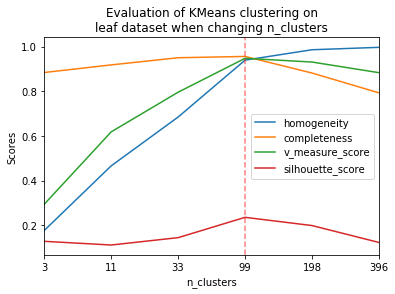

In [171]:
ax = kmeans_performance_df1[['homogeneity','completeness','v_measure_score','silhouette_score']].plot()
ax.set_ylabel("Scores")
ax.set_title("Evaluation of KMeans clustering on\nleaf dataset when changing n_clusters")
idxmax = [i for i in range(kmeans_performance_df1.shape[0]) if kmeans_performance_df1.index[i] == kmeans_performance_df1.idxmax()['silhouette_score']]
ax.axvline(x=idxmax[0],color='r',ls='--',alpha=0.5)
plt.savefig('pics/KMs_leaf.png')
plt.show()

In [16]:
kmeans_performance_df[['n_clusters','sum_of_distances','running_time']]

,n_clusters,sum_of_distances,running_time
0,3,147063.304080,0.447901
1,11,111689.603093,0.394931
2,33,80611.038207,0.640676
3,99,43105.062142,1.051205
4,198,28138.481632,2.216201
5,396,16020.432453,3.723938


### EM Clustering

In [17]:
def bench_EMs(Ks, X, Y, random_state):
    running_time = []
    BIC = []
    homogeneity_score = []
    completeness_score = []
    v_measure_score = []
    adjusted_rand_score = []
    adjusted_mutual_info_score = []
    silhouette_score = []
    for K in Ks:
        estimator = mixture.GaussianMixture(n_components = K, random_state = random_state)
        t0 = time()
        estimator.fit(X)
        predicted = estimator.predict(X)
        running_time.append(time() - t0)
        BIC.append(estimator.bic(X))
        homogeneity_score.append(metrics.homogeneity_score( Y, predicted))
        completeness_score.append(metrics.completeness_score( Y, predicted))
        v_measure_score.append(metrics.v_measure_score( Y, predicted))
        adjusted_rand_score.append(metrics.adjusted_rand_score( Y, predicted)) 
        adjusted_mutual_info_score.append(metrics.adjusted_mutual_info_score( Y,  predicted)) 
        silhouette_score.append(metrics.silhouette_score(X, predicted,
                                      metric='euclidean',
                                      sample_size=X.shape[0]))
    
    performance_df = pd.DataFrame({"n_components":Ks,
                                   "running_time":running_time,
                                  "BIC":BIC,
                                  "homogeneity":homogeneity_score,
                                  "completeness":completeness_score,
                                  "v_measure_score":v_measure_score,
                                  "adjusted_rand_score":adjusted_rand_score,
                                  "adjusted_mutual_info_score": adjusted_mutual_info_score,
                                  "silhouette_score":silhouette_score
                                  })
    return performance_df
   

In [18]:
EMs_performance_df = bench_EMs([3,11,33,99,198,396],features,labels,random_state = 6)
EMs_performance_df.n_components = EMs_performance_df.n_components.astype(str)
EMs_performance_df1 = EMs_performance_df.set_index('n_components')

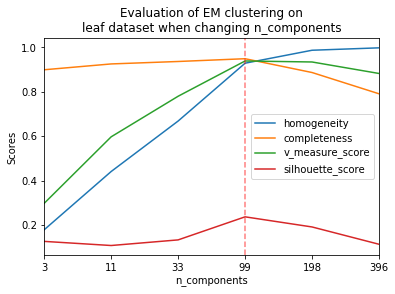

In [172]:
ax = EMs_performance_df1[['homogeneity','completeness','v_measure_score','silhouette_score']].plot()
ax.set_ylabel("Scores")
ax.set_title("Evaluation of EM clustering on\nleaf dataset when changing n_components")
idxmax = [i for i in range(EMs_performance_df1.shape[0]) if EMs_performance_df1.index[i] == EMs_performance_df1.idxmax()['silhouette_score']]
ax.axvline(x=idxmax[0],color='r',ls='--',alpha=0.5)
plt.savefig('pics/EMs_leaf.png')
plt.show()

In [20]:
EMs_performance_df[['n_components','BIC','running_time']]

,n_components,BIC,running_time
0,3,2.836522e+05,0.316816
1,11,6.275359e+05,0.359403
2,33,2.600927e+06,0.769957
3,99,1.069006e+07,2.205088
4,198,2.339174e+07,4.668941
5,396,4.891215e+07,11.067520


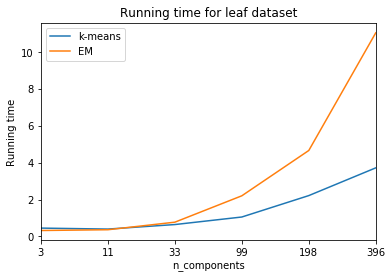

In [170]:
kmeans_performance_df1['running_time'].plot(label='k-means')
EMs_performance_df1['running_time'].plot(label='EM')
plt.ylabel('Running time')
plt.title('Running time for leaf dataset')
plt.legend()
plt.savefig('pics/clustering_running_time_leaf.png')

### Then i applied four dimension reduction algorithms (PCA, ICA, RP, and FA) to original data
### First we have to justify the ideal output dimension for each algorithms. Here I use a simple classifier Naive Bayes classifer to cross validate the hyper parameter n_components.

In [21]:
def compute_cv_scores(estimator, X, Y, n_components):
    scores = []
    for n in n_components:
        estimator.n_components = n
        tX = estimator.fit_transform(X)
        #use simple Naive Bayes classifer to cross validate n_components
        gb = GaussianNB()
        scores.append(np.mean(cross_val_score(gb, tX,Y,scoring='accuracy',cv=2)))
    return scores

In [22]:
n_components = [i for i in range(2,original_dim//2,10)]
pca = PCA(svd_solver='full',random_state=6)
pca_cv_scores = compute_cv_scores(pca,features,dlabels,n_components)
ica = FastICA(random_state=6)
ica_cv_scores = compute_cv_scores(ica,features,dlabels,n_components)
rp = random_projection.SparseRandomProjection(random_state=6)
rp_cv_scores = compute_cv_scores(rp,features,dlabels,n_components)
fa = FactorAnalysis(random_state=6)
fa_cv_scores = compute_cv_scores(fa,features,dlabels,n_components)

In [23]:
cv_n_components_df = pd.DataFrame()
cv_n_components_df['n_components'] = n_components
cv_n_components_df['pca'] = pca_cv_scores
cv_n_components_df['ica'] = ica_cv_scores
cv_n_components_df['rp'] = rp_cv_scores
cv_n_components_df['fa'] = fa_cv_scores

In [24]:
cv_n_components_df.n_components = cv_n_components_df.n_components.astype('str')
cv_n_components_df.set_index('n_components',inplace=True)


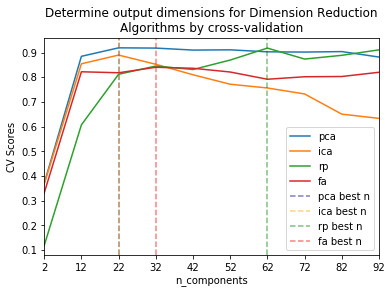

In [106]:
ax = cv_n_components_df.plot(title = "Determine output dimensions for Dimension Reduction\nAlgorithms by cross-validation")
idxmax_pca = [i for i in range(cv_n_components_df.shape[0]) if cv_n_components_df.index[i] == cv_n_components_df.idxmax()['pca']]
ax.axvline(x=idxmax_pca[0],color='navy',ls='--',alpha=0.5,label = 'pca best n')
idxmax_ica = [i for i in range(cv_n_components_df.shape[0]) if cv_n_components_df.index[i] == cv_n_components_df.idxmax()['ica']]
ax.axvline(x=idxmax_ica[0],color='orange',ls='--',alpha=0.5,label = 'ica best n')
idxmax_rp = [i for i in range(cv_n_components_df.shape[0]) if cv_n_components_df.index[i] == cv_n_components_df.idxmax()['rp']]
ax.axvline(x=idxmax_rp[0],color='green',ls='--',alpha=0.5,label = 'rp best n')
idxmax_fa = [i for i in range(cv_n_components_df.shape[0]) if cv_n_components_df.index[i] == cv_n_components_df.idxmax()['fa']]
ax.axvline(x=idxmax_fa[0],color='red',ls='--',alpha=0.5,label = 'fa best n')
ax.set_ylabel('CV Scores')
ax.legend(loc='lower right')
plt.savefig('pics/Evaluate_n_components_leaf.png')
plt.show()

#### Best output dimensions for PCA, ICA, RP and FA are

In [26]:
n_components[idxmax_pca[0]],n_components[idxmax_ica[0]],n_components[idxmax_rp[0]],n_components[idxmax_fa[0]]

(22, 22, 62, 32)

### PCA for dimension reduction from 192 to 22

In [27]:
pca = PCA(svd_solver='full',n_components=22,random_state=6)
pca.fit(features)
pca_X = pca.transform(features)

In [28]:
eigenvalues_pca = pca.explained_variance_

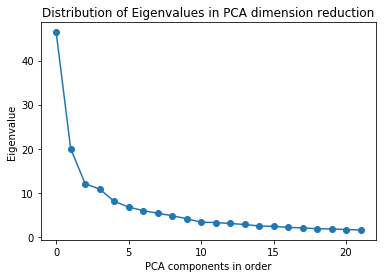

In [108]:
plt.plot(eigenvalues_pca,'-o')
plt.title("Distribution of Eigenvalues in PCA dimension reduction")
plt.xlabel("PCA components in order")
plt.ylabel('Eigenvalue')
plt.savefig('pics/pca_eigenvalues_leaf.png')
plt.show()

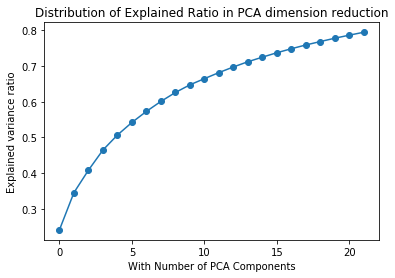

In [109]:
pca_exp = pca.explained_variance_ratio_
plt.plot(np.cumsum(pca_exp),'-o')
plt.title("Distribution of Explained Ratio in PCA dimension reduction")
plt.xlabel("With Number of PCA Components")
plt.ylabel("Explained variance ratio")
plt.savefig('pics/pca_explained_variance_ratio_leaf.png')
plt.show()

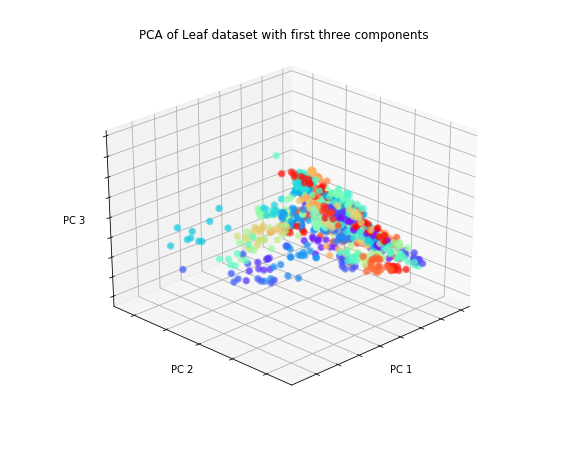

In [110]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=45)
colors = cm.rainbow(np.linspace(0,1,99))

for color, i  in zip(colors, labels.unique() ):
    ax.scatter(pca_X[labels == i, 0],pca_X[labels == i, 1],pca_X[labels == i, 2], color=color, alpha=.6, lw=3)
   
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.set_title("PCA of Leaf dataset with first three components")
ax.dist = 12
plt.savefig('pics/pca_3d_first3_leaf.png')
fig.show()

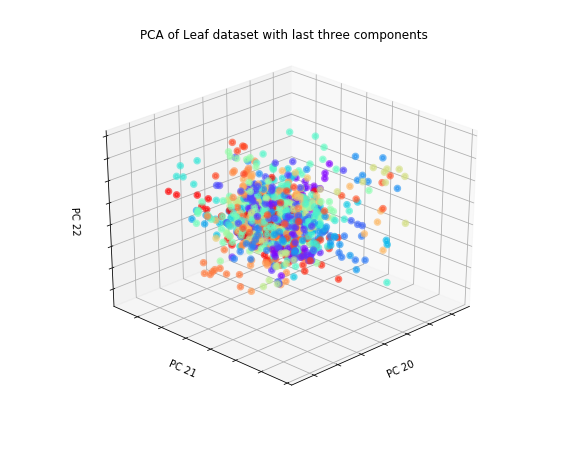

In [111]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=45)
colors = cm.rainbow(np.linspace(0,1,99))

for color, i  in zip(colors, labels.unique() ):
    ax.scatter(pca_X[labels == i, -3],pca_X[labels == i, -2],pca_X[labels == i, -1], color=color, alpha=.6, lw=3)
   
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('PC 20')
ax.set_ylabel('PC 21')
ax.set_zlabel('PC 22')
ax.set_title("PCA of Leaf dataset with last three components")
ax.dist = 12
plt.savefig('pics/pca_3d_last3_leaf.png')
fig.show()

In [33]:
# Scale and visualize the embedding vectors                            
def plot_embedding(X,y, title=None):     
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)                           
    colors = cm.rainbow(np.linspace(0,1,99))
    plt.figure(figsize=(10,8))              
    ax = plt.subplot(111)      
    for i in range(X.shape[0]):  
                plt.text(X[i, 0], X[i, 1],str(y[i]),
                 color=colors[y[i]] ,         
                 fontdict={'weight': 'bold', 'size': 9})
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)
    plot_margin = 0.05

    x0, x1, y0, y1 = plt.axis()
    plt.axis((x0 - plot_margin,
              x1 + plot_margin,
              y0 - plot_margin,
              y1 + plot_margin))

In [34]:
tsne = manifold.TSNE(n_components=2, random_state=0)

pca_X_tsne = tsne.fit_transform(pca_X)

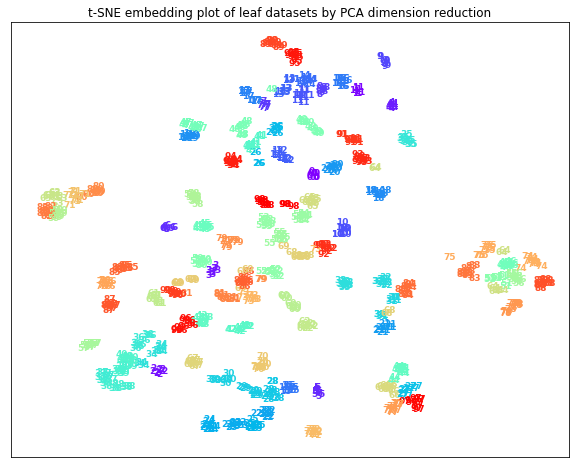

In [112]:
plot_embedding(pca_X_tsne, dlabels,                                  
            "t-SNE embedding plot of leaf datasets by PCA dimension reduction")                           
plt.savefig('pics/pca_leaf_tsne.png')
plt.show() 

#### Reproduce KMeans and EM clustering using PCA data

In [36]:
kmeans_performance_df_pca = bench_k_means([3,11,33,99,198,396],pca_X,dlabels,random_state = 6)
kmeans_performance_df_pca.n_clusters = kmeans_performance_df_pca.n_clusters.astype(str)
kmeans_performance_df_pca1 = kmeans_performance_df_pca.set_index('n_clusters')

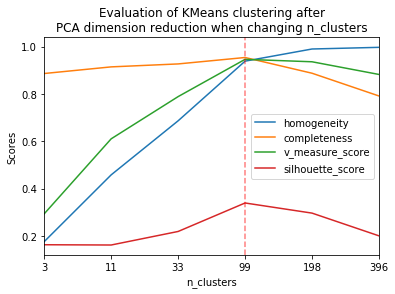

In [113]:
ax = kmeans_performance_df_pca1[['homogeneity','completeness','v_measure_score','silhouette_score']].plot()
ax.set_ylabel("Scores")
ax.set_title("Evaluation of KMeans clustering after\nPCA dimension reduction when changing n_clusters")
idxmin = [i for i in range(kmeans_performance_df_pca1.shape[0]) if kmeans_performance_df_pca1.index[i] == kmeans_performance_df_pca1.idxmax()['silhouette_score']]
ax.axvline(x=idxmin[0],color='r',ls='--',alpha=0.5)
plt.savefig('pics/KMs_pca_leaf.png')
plt.show()

In [38]:
EMs_performance_df_pca = bench_EMs([3,11,33,99,198,396],pca_X,dlabels,random_state = 6)
EMs_performance_df_pca.n_components = EMs_performance_df_pca.n_components.astype(str)
EMs_performance_df_pca1 = EMs_performance_df_pca.set_index('n_components')

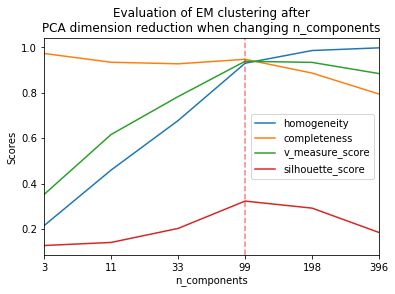

In [114]:
ax = EMs_performance_df_pca1[['homogeneity','completeness','v_measure_score','silhouette_score']].plot()
ax.set_ylabel("Scores")
ax.set_title("Evaluation of EM clustering after\nPCA dimension reduction when changing n_components")
idxmin = [i for i in range(EMs_performance_df1.shape[0]) if EMs_performance_df1.index[i] == EMs_performance_df1.idxmax()['silhouette_score']]
ax.axvline(x=idxmin[0],color='r',ls='--',alpha=0.5)
plt.savefig('pics/EMs_pca_cancer.png')
plt.show()

### ICA dimension reduction 
#### from above cross validation, it's better to do dimension reduction from  192 to 22 

In [40]:
ica = FastICA(n_components=22,random_state=6)
ica.fit(features)
ica_X = ica.transform(features)
kurts = kurtosis(ica_X,axis = 0)

### Transformed features with kurtosis value >= 2 were selected

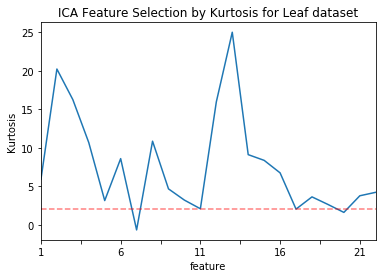

In [119]:
kurts_df = pd.DataFrame({'kurts' : kurts,'feature':[i for i in range(len(kurts))]})

kurts_df1 = kurts_df.sort_values(by = 'kurts',ascending = False)
ica_selected = kurts_df1.loc[kurts_df1['kurts'] >= 2,:].values[:,0].astype(int)
ica_X_selected = ica_X[:,list(ica_selected)]
kurts_df.feature = kurts_df.feature + 1
kurts_df.feature = kurts_df.feature.astype('str')
kurts_df2 = kurts_df.set_index('feature')
ax = kurts_df2.plot()
ax.set_ylabel("Kurtosis")
ax.set_title("ICA Feature Selection by Kurtosis for Leaf dataset")
ax.axhline(y=2,color='r',ls='--',alpha=0.5)
ax.legend().set_visible(False)
plt.savefig('pics/ica_kurtosis_leaf.png')
plt.show()


In [117]:
ica_X_selected.shape

(990, 20)

### Present high dimension data by tSNE

In [44]:
tsne = manifold.TSNE(n_components=2, random_state=0)

ica_X_tsne = tsne.fit_transform(ica_X_selected)

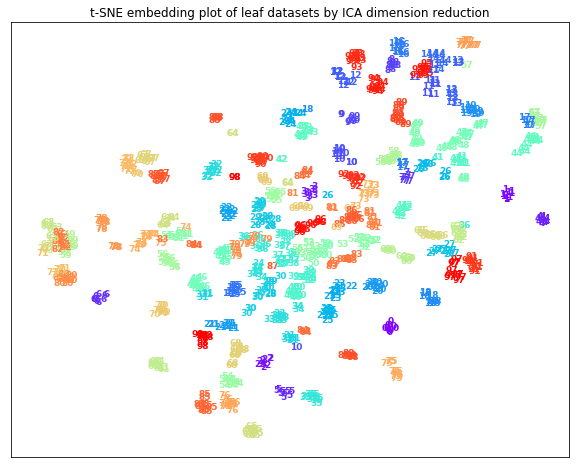

In [120]:
plot_embedding(ica_X_tsne, dlabels,                                  
            "t-SNE embedding plot of leaf datasets by ICA dimension reduction")                           
plt.savefig('pics/ica_leaf_tsne.png')
plt.show() 

### Plot 3 features having top kurtosis values

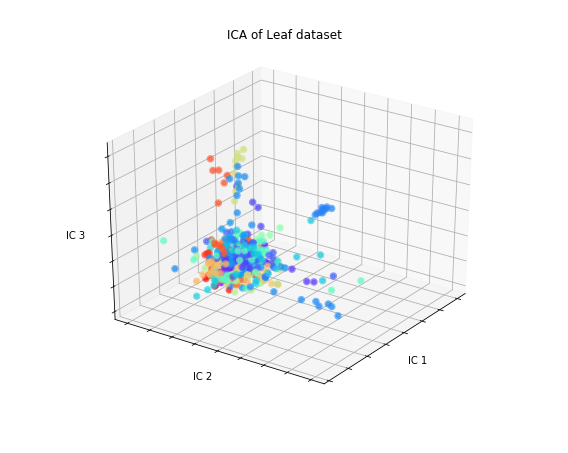

In [121]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=35)
colors = cm.rainbow(np.linspace(0,1,99))

for color, i  in zip(colors, labels.unique() ):
    ax.scatter(ica_X[labels == i, ica_selected[0]],ica_X[labels == i, ica_selected[1]],ica_X[labels == i, ica_selected[2]], color=color, alpha=.6, lw=3)
   
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
ax.set_zlabel('IC 3')
ax.set_title("ICA of Leaf dataset")
ax.dist = 12
plt.savefig('pics/ica_3d_first3_leaf.png')
fig.show()

### Plot 3 features having least kurtosis values

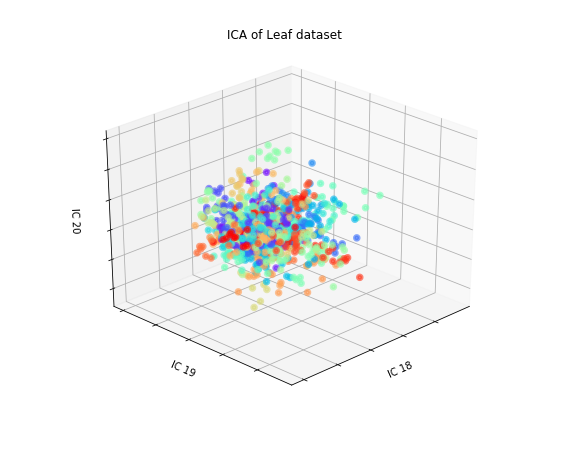

In [122]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=45)
colors = cm.rainbow(np.linspace(0,1,99))

for color, i  in zip(colors, labels.unique() ):
    ax.scatter(ica_X[labels == i, ica_selected[-1]],ica_X[labels == i, ica_selected[-2]],ica_X[labels == i, ica_selected[-3]], color=color, alpha=.6, lw=3)
   
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('IC 18')
ax.set_ylabel('IC 19')
ax.set_zlabel('IC 20')
ax.set_title("ICA of Leaf dataset")
ax.dist = 12
plt.savefig('pics/ica_3d_last3_leaf.png')
fig.show()

In [48]:
kmeans_performance_df_ica = bench_k_means([3,11,33,99,198,396],ica_X_selected,dlabels,random_state = 6)
kmeans_performance_df_ica.n_clusters = kmeans_performance_df_ica.n_clusters.astype(str)
kmeans_performance_df_ica1 = kmeans_performance_df_ica.set_index('n_clusters')

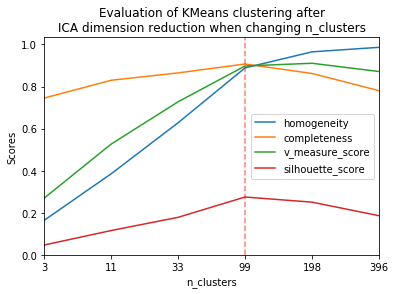

In [123]:
ax = kmeans_performance_df_ica1[['homogeneity','completeness','v_measure_score','silhouette_score']].plot()
ax.set_ylabel("Scores")
ax.set_title("Evaluation of KMeans clustering after\nICA dimension reduction when changing n_clusters")
idxmax = [i for i in range(kmeans_performance_df_ica1.shape[0]) if kmeans_performance_df_ica1.index[i] == kmeans_performance_df_ica1.idxmax()['silhouette_score']]
ax.axvline(x=idxmax[0],color='r',ls='--',alpha=0.5)
plt.savefig('pics/KMs_ica_leaf.png')
plt.show()

In [50]:
EMs_performance_df_ica = bench_EMs([3,11,33,99,198,396],ica_X_selected,dlabels,random_state = 6)
EMs_performance_df_ica.n_components = EMs_performance_df_ica.n_components.astype(str)
EMs_performance_df_ica1 = EMs_performance_df_ica.set_index('n_components')

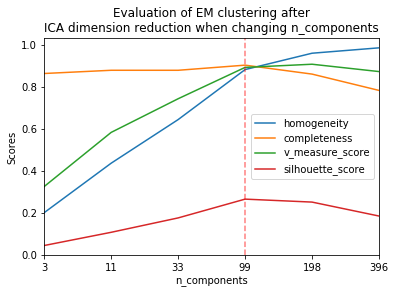

In [124]:
ax = EMs_performance_df_ica1[['homogeneity','completeness','v_measure_score','silhouette_score']].plot()
ax.set_ylabel("Scores")
ax.set_title("Evaluation of EM clustering after\nICA dimension reduction when changing n_components")
idxmax = [i for i in range(EMs_performance_df_ica1.shape[0]) if EMs_performance_df_ica1.index[i] == EMs_performance_df_ica1.idxmax()['silhouette_score']]
ax.axvline(x=idxmax[0],color='r',ls='--',alpha=0.5)
plt.savefig('pics/EMs_ica_leaf.png')
plt.show()

### random project for dimension reduction from 192 to 62

In [52]:
rp = random_projection.SparseRandomProjection(n_components=62,random_state=6)
rp.fit(features)
rp_X = rp.transform(features)

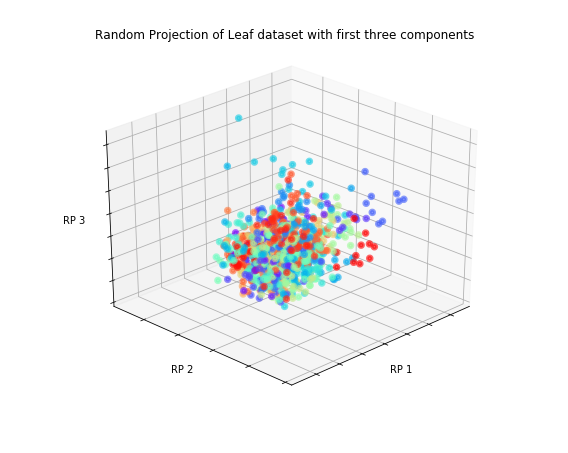

In [125]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=45)
colors = cm.rainbow(np.linspace(0,1,99))

for color, i  in zip(colors, labels.unique() ):
    ax.scatter(rp_X[labels == i, 0],rp_X[labels == i, 1],rp_X[labels == i, 2], color=color, alpha=.6, lw=3)
   
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('RP 1')
ax.set_ylabel('RP 2')
ax.set_zlabel('RP 3')
ax.set_title("Random Projection of Leaf dataset with first three components")
ax.dist = 12
plt.savefig('pics/rp_3d_first3_leaf.png')
fig.show()

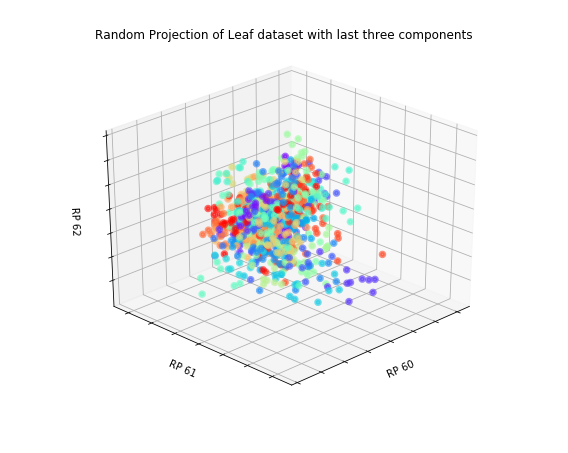

In [126]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=45)
colors = cm.rainbow(np.linspace(0,1,99))

for color, i  in zip(colors, labels.unique() ):
    ax.scatter(rp_X[labels == i, -3],rp_X[labels == i, -2],rp_X[labels == i, -1], color=color, alpha=.6, lw=3)
   
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('RP 60')
ax.set_ylabel('RP 61')
ax.set_zlabel('RP 62')
ax.set_title("Random Projection of Leaf dataset with last three components")
ax.dist = 12
plt.savefig('pics/rp_3d_last3_leaf.png')
fig.show()

In [55]:
tsne = manifold.TSNE(n_components=2, random_state=0)
rp_X_tsne = tsne.fit_transform(rp_X)

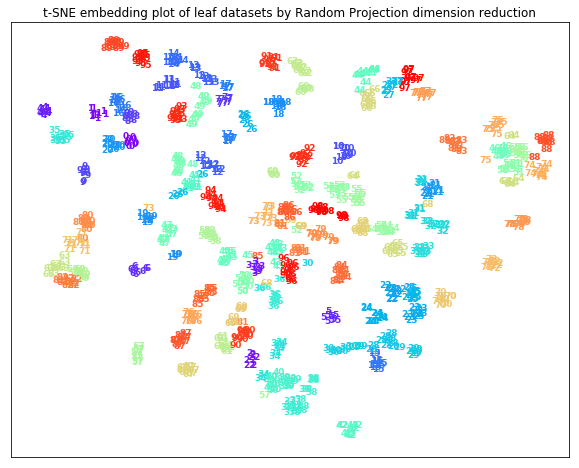

In [127]:
plot_embedding(rp_X_tsne, dlabels,                                  
            "t-SNE embedding plot of leaf datasets by Random Projection dimension reduction")
plt.savefig('pics/rp_leaf_tsne.png')
plt.show() 

### Reproduce clustering from random projection data

In [57]:
kmeans_performance_df_rp = bench_k_means([3,11,33,99,198,396],rp_X,dlabels,random_state = 6)
kmeans_performance_df_rp.n_clusters = kmeans_performance_df_rp.n_clusters.astype(str)
kmeans_performance_df_rp1 = kmeans_performance_df_rp.set_index('n_clusters')

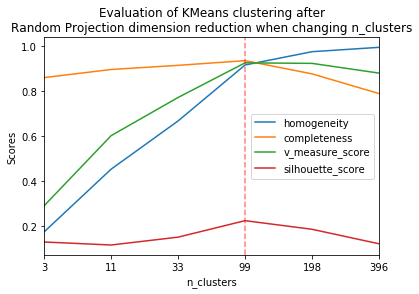

In [153]:
ax = kmeans_performance_df_rp1[['homogeneity','completeness','v_measure_score','silhouette_score']].plot()
ax.set_ylabel("Scores")
ax.set_title("Evaluation of KMeans clustering after\nRandom Projection dimension reduction when changing n_clusters")
idxmax = [i for i in range(kmeans_performance_df_rp1.shape[0]) if kmeans_performance_df_rp1.index[i] == kmeans_performance_df_rp1.idxmax()['silhouette_score']]
ax.axvline(x=idxmax[0],color='r',ls='--',alpha=0.5)
plt.savefig('pics/KMs_rp_leaf.png')
plt.show()

In [59]:
EMs_performance_df_rp = bench_EMs([3,11,33,99,198,396],rp_X,dlabels,random_state = 6)
EMs_performance_df_rp.n_components = EMs_performance_df_rp.n_components.astype(str)
EMs_performance_df_rp1 = EMs_performance_df_rp.set_index('n_components')

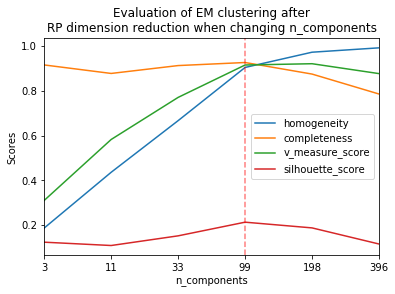

In [152]:
ax = EMs_performance_df_rp1[['homogeneity','completeness','v_measure_score','silhouette_score']].plot()
ax.set_ylabel("Scores")
ax.set_title("Evaluation of EM clustering after\nRP dimension reduction when changing n_components")
idxmax = [i for i in range(EMs_performance_df_rp1.shape[0]) if EMs_performance_df_rp1.index[i] == EMs_performance_df_rp1.idxmax()['silhouette_score']]
ax.axvline(x=idxmax[0],color='r',ls='--',alpha=0.5)
plt.savefig('pics/EMs_rp_leaf.png')
plt.show()

### Factor analysis for dimension reduction from 192 to 32

In [61]:
fa = FactorAnalysis(n_components=32,random_state=6)
fa_X = fa.fit(features,dlabels).transform(features)

In [62]:
fa_X.shape

(990, 32)

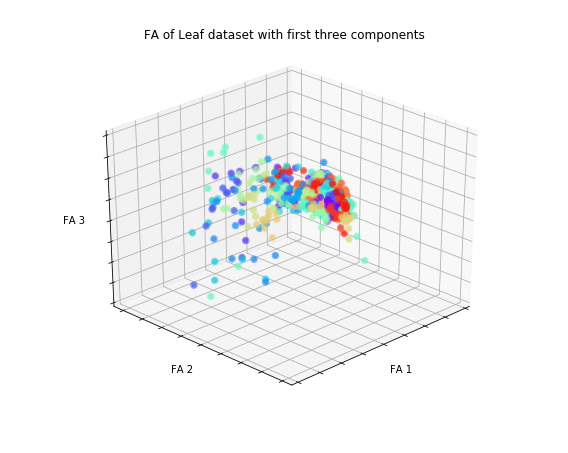

In [132]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=45)
colors = cm.rainbow(np.linspace(0,1,99))

for color, i  in zip(colors, labels.unique() ):
    ax.scatter(fa_X[labels == i, 0],fa_X[labels == i, 1],fa_X[labels == i, 2], color=color, alpha=.6, lw=3)
   
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('FA 1')
ax.set_ylabel('FA 2')
ax.set_zlabel('FA 3')
ax.set_title("FA of Leaf dataset with first three components")
ax.dist = 12
plt.savefig('pics/fa_3d_first3_leaf.png')
fig.show()

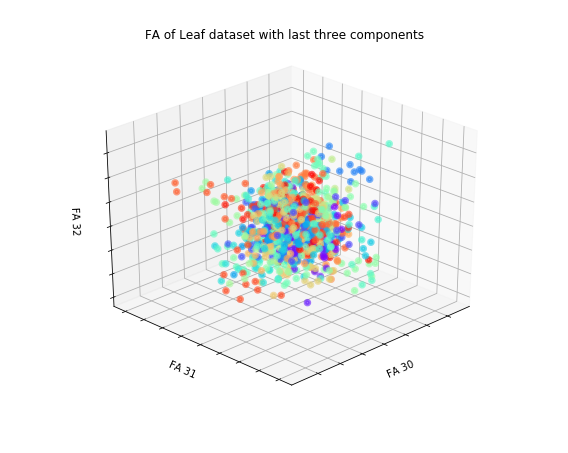

In [133]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=45)
colors = cm.rainbow(np.linspace(0,1,99))

for color, i  in zip(colors, labels.unique() ):
    ax.scatter(fa_X[labels == i, -3],fa_X[labels == i, -2],fa_X[labels == i, -1], color=color, alpha=.6, lw=3)
   
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('FA 30')
ax.set_ylabel('FA 31')
ax.set_zlabel('FA 32')
ax.set_title("FA of Leaf dataset with last three components")
ax.dist = 12
plt.savefig('pics/fa_3d_last3_leaf.png')
fig.show()

In [65]:
tsne = manifold.TSNE(n_components=2, random_state=0)

fa_X_tsne = tsne.fit_transform(fa_X)

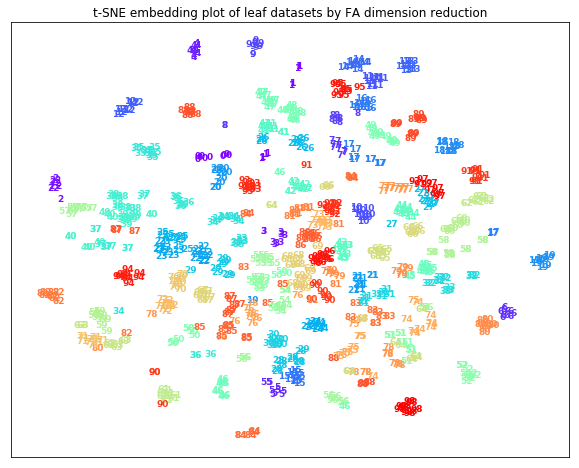

In [134]:
plot_embedding(fa_X_tsne, dlabels,                                  
            "t-SNE embedding plot of leaf datasets by FA dimension reduction")                           
plt.savefig('pics/fa_leaf_sne.png')
plt.show() 

In [67]:
kmeans_performance_df_fa = bench_k_means([3,11,33,99,198,396],fa_X,dlabels,random_state = 6)
kmeans_performance_df_fa.n_clusters = kmeans_performance_df_fa.n_clusters.astype(str)
kmeans_performance_df_fa1 = kmeans_performance_df_fa.set_index('n_clusters')

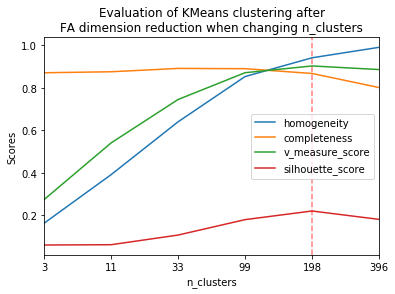

In [135]:
ax = kmeans_performance_df_fa1[['homogeneity','completeness','v_measure_score','silhouette_score']].plot()
ax.set_ylabel("Scores")
ax.set_title("Evaluation of KMeans clustering after\nFA dimension reduction when changing n_clusters")
idxmax = [i for i in range(kmeans_performance_df_fa1.shape[0]) if kmeans_performance_df_fa1.index[i] == kmeans_performance_df_fa1.idxmax()['silhouette_score']]
ax.axvline(x=idxmax[0],color='r',ls='--',alpha=0.5)
plt.savefig('pics/kmeans_fa_leaf.png')
plt.show()

In [69]:
EMs_performance_df_fa = bench_EMs([3,11,33,99,198,396],fa_X,dlabels,random_state = 6)
EMs_performance_df_fa.n_components = EMs_performance_df_fa.n_components.astype(str)
EMs_performance_df_fa1 = EMs_performance_df_fa.set_index('n_components')

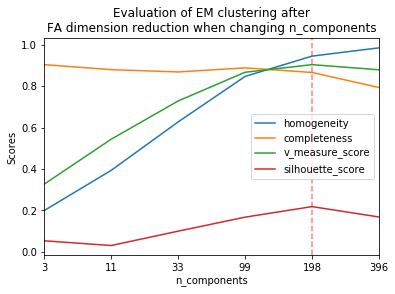

In [136]:
ax = EMs_performance_df_fa1[['homogeneity','completeness','v_measure_score','silhouette_score']].plot()
ax.set_ylabel("Scores")
ax.set_title("Evaluation of EM clustering after\nFA dimension reduction when changing n_components")
idxmax = [i for i in range(EMs_performance_df_fa1.shape[0]) if EMs_performance_df_fa1.index[i] == EMs_performance_df_fa1.idxmax()['silhouette_score']]
ax.axvline(x=idxmax[0],color='r',ls='--',alpha=0.5)
plt.savefig('pics/EMs_fa_leaf.png')
plt.show()

In [96]:
def bench_k_means_DRs(Xs, Y, names, random_state):
    running_time = []
    sumOfDistance = []
    homogeneity_score = []
    completeness_score = []
    v_measure_score = []
    adjusted_rand_score = []
    adjusted_mutual_info_score = []
    silhouette_score = []
    for X in Xs:
        estimator = KMeans(n_clusters = 99, random_state = random_state)
        t0 = time()
        estimator.fit(X)
        running_time.append(time() - t0)
        sumOfDistance.append(estimator.inertia_)
        homogeneity_score.append(metrics.homogeneity_score( Y, estimator.labels_))
        completeness_score.append(metrics.completeness_score( Y, estimator.labels_))
        v_measure_score.append(metrics.v_measure_score( Y, estimator.labels_))
        adjusted_rand_score.append(metrics.adjusted_rand_score( Y, estimator.labels_)) 
        adjusted_mutual_info_score.append(metrics.adjusted_mutual_info_score( Y,  estimator.labels_)) 
        silhouette_score.append(metrics.silhouette_score(X, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=X.shape[0]))
    
    performance_df = pd.DataFrame({"Names":names,
                                   "running_time":running_time,
                                  "sum_of_distances":sumOfDistance,
                                  "homogeneity":homogeneity_score,
                                  "completeness":completeness_score,
                                  "v_measure_score":v_measure_score,
                                  "adjusted_rand_score":adjusted_rand_score,
                                  "adjusted_mutual_info_score": adjusted_mutual_info_score,
                                  "silhouette_score":silhouette_score
                                  })
    return performance_df
   

In [97]:
def bench_EMs_DRs( Xs, Y, names, random_state):
    running_time = []
    BIC = []
    homogeneity_score = []
    completeness_score = []
    v_measure_score = []
    adjusted_rand_score = []
    adjusted_mutual_info_score = []
    silhouette_score = []
    for X in Xs:
        estimator = mixture.GaussianMixture(n_components = 99, random_state = random_state)
        t0 = time()
        estimator.fit(X)
        predicted = estimator.predict(X)
        running_time.append(time() - t0)
        BIC.append(estimator.bic(X))
        homogeneity_score.append(metrics.homogeneity_score( Y, predicted))
        completeness_score.append(metrics.completeness_score( Y, predicted))
        v_measure_score.append(metrics.v_measure_score( Y, predicted))
        adjusted_rand_score.append(metrics.adjusted_rand_score( Y, predicted)) 
        adjusted_mutual_info_score.append(metrics.adjusted_mutual_info_score( Y,  predicted)) 
        silhouette_score.append(metrics.silhouette_score(X, predicted,
                                      metric='euclidean',
                                      sample_size=X.shape[0]))
    
    performance_df = pd.DataFrame({"Names":names,
                                   "running_time":running_time,
                                  "BIC":BIC,
                                  "homogeneity":homogeneity_score,
                                  "completeness":completeness_score,
                                  "v_measure_score":v_measure_score,
                                  "adjusted_rand_score":adjusted_rand_score,
                                  "adjusted_mutual_info_score": adjusted_mutual_info_score,
                                  "silhouette_score":silhouette_score
                                  })
    return performance_df

In [98]:
names = ['original', 'pca', 'ica', 'rp', 'fa']
Xs = [features, pca_X, ica_X_selected, rp_X, fa_X]

In [99]:
km_dr_df = bench_k_means_DRs(Xs,dlabels, names, 6)
km_dr_df.set_index('Names',inplace = True)

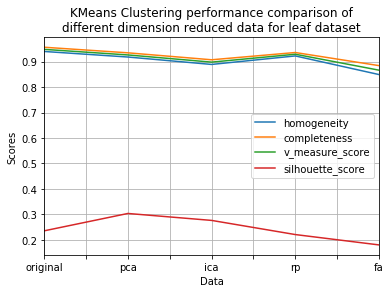

In [137]:

ax = km_dr_df[['homogeneity','completeness','v_measure_score','silhouette_score']].plot()
ax.set_ylabel('Scores')
ax.set_xlabel('Data')
ax.set_title('KMeans Clustering performance comparison of\ndifferent dimension reduced data for leaf dataset')
ax.grid()
plt.savefig('pics/kmeans_dr_all_leaf.png')
plt.show()

In [101]:
em_dr_df = bench_EMs_DRs(Xs,dlabels, names, 6)
em_dr_df.set_index('Names',inplace = True)

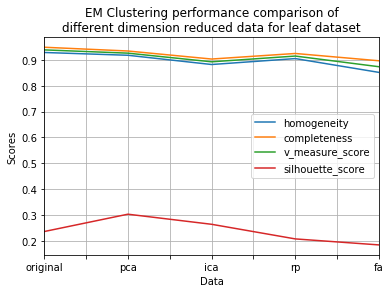

In [138]:
ax = em_dr_df[['homogeneity','completeness','v_measure_score','silhouette_score']].plot()
ax.set_ylabel('Scores')
ax.set_xlabel('Data')
ax.set_title('EM Clustering performance comparison of\ndifferent dimension reduced data for leaf dataset')
ax.grid()
plt.savefig('pics/EMs_dr_all_leaf.png')
plt.show()

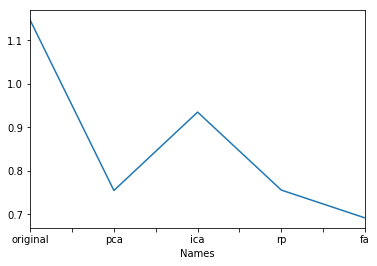

In [140]:
km_dr_df['running_time'].plot()

## Run Neural Net on dimension reduced data

### First  scale and split data into train and test

In [71]:
strat_shuffle_split = StratifiedShuffleSplit(dlabels, test_size=0.2, random_state=88)
pca_X = scale(pca_X)
ica_X_selected = scale(ica_X_selected)
rp_X = scale(rp_X)
fa_X = scale(fa_X)
for train_index, test_index in strat_shuffle_split:
    X_train, X_test = features[train_index,:], features[test_index,:]
    pca_X_train, pca_X_test = pca_X[train_index,:], pca_X[test_index,:]
    ica_X_train, ica_X_test = ica_X_selected[train_index,:], ica_X_selected[test_index,:]
    rp_X_train, rp_X_test = rp_X[train_index,:], rp_X[test_index,:]
    fa_X_train, fa_X_test = fa_X[train_index,:], fa_X[test_index,:]
    y_train, y_test = dlabels[train_index], dlabels[test_index]

In [72]:
origin_best_mlp = MLPClassifier(solver = "sgd",hidden_layer_sizes=[100,40],
                   learning_rate_init=0.1,random_state=10,
                   alpha=1,momentum = 0.8,max_iter=200)

In [73]:
train_drs = [X_train, pca_X_train,ica_X_train,rp_X_train,fa_X_train]
test_drs = [X_test, pca_X_test,ica_X_test,rp_X_test,fa_X_test]
names = ['original','pca','ica','rp','fa']

In [74]:
log_cols=["Data", "Train_Accuracy","Test_Accuracy", "Training_time"]
final_performance4 = pd.DataFrame(columns = log_cols)
repeat = 20

for X_train, X_test, name in zip( train_drs, test_drs, names):
    print("="*30)
    print(name)
    clf =  MLPClassifier(solver = "sgd",hidden_layer_sizes=[100,40],
                   learning_rate_init=0.1,
                   alpha=1,momentum = 0.8,max_iter=200)
    train_acc = []
    test_acc = []
    training_time = []
    for _ in range(repeat):
        start1 = time()
        clf.fit(X_train, y_train)
        training_time.append(time() - start1)
        train_predictions = clf.predict(X_train)
        train_acc.append(accuracy_score(y_train, train_predictions))

        test_predictions = clf.predict(X_test)
        
        test_acc.append(accuracy_score(y_test, test_predictions))


    log_entry = pd.DataFrame([[name, np.mean(train_acc)*100, np.mean(test_acc)*100, np.mean(training_time)]], columns=log_cols)
    final_performance4 = final_performance4.append(log_entry)
final_performance4 = final_performance4.reset_index(drop=True)
print("="*30)

original
pca
ica
rp
fa


In [75]:
final_performance4

,Data,Train_Accuracy,Test_Accuracy,Training_time
0,original,100.000000,98.156566,2.767122
1,pca,99.981061,97.045455,2.170983
2,ica,99.943182,95.984848,1.971071
3,rp,100.000000,96.616162,2.408428
4,fa,100.000000,97.070707,2.193648


In [76]:
def one_hot_encode(x, n_classes):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
     """
    return np.eye(n_classes)[x]

In [77]:
km99 =KMeans(n_clusters = 99, random_state = 6)
km99.fit(features)
km99_cluster = km99.predict(features)
n_classes = 99
km99_cluster_features = one_hot_encode(km99_cluster, n_classes)

In [78]:
em99 = mixture.GaussianMixture(n_components = 99, random_state = 6)
em99.fit(features)
em99_cluster = em99.predict(features)
n_classes = 99
em99_cluster_features = one_hot_encode(em99_cluster, n_classes)


In [79]:
feature_plus_km99 = np.column_stack((features, km99_cluster_features))
feature_plus_em99 = np.column_stack((features, em99_cluster_features))

In [80]:
strat_shuffle_split = StratifiedShuffleSplit(dlabels, test_size=0.2, random_state=88)

for train_index, test_index in strat_shuffle_split:
    X_train, X_test = features[train_index,:], features[test_index,:]
    km_X_train, km_X_test = km99_cluster_features[train_index,:], km99_cluster_features[test_index,:]
    em_X_train, em_X_test = em99_cluster_features[train_index,:], em99_cluster_features[test_index,:]
    plus_km_X_train, plus_km_X_test = feature_plus_km99[train_index,:], feature_plus_km99[test_index,:]
    plus_em_X_train, plus_em_X_test = feature_plus_em99[train_index,:], feature_plus_em99[test_index,:]
    y_train, y_test = dlabels[train_index], dlabels[test_index]

In [81]:
train_news = [X_train, km_X_train, plus_km_X_train, em_X_train, plus_em_X_train]
test_news = [X_test, km_X_test, plus_km_X_test, em_X_test, plus_em_X_test]
names_5 = ['original','km_cluster', 'original_km_cluster', 'em_cluster', 'original_em_cluster']

In [82]:
log_cols=["Data", "Train_Accuracy","Test_Accuracy", "Training_time"]
final_performance5 = pd.DataFrame(columns = log_cols)
repeat = 20

for X_train, X_test, name in zip( train_news, test_news, names_5):
    print("="*30)
    print(name)
    clf =  MLPClassifier(solver = "sgd",hidden_layer_sizes=[100,40],
                   learning_rate_init=0.1,
                   alpha=1,momentum = 0.8,max_iter=200)
    train_acc = []
    test_acc = []
    training_time = []
    for _ in range(repeat):
        start1 = time()
        clf.fit(X_train, y_train)
        training_time.append(time() - start1)
        train_predictions = clf.predict(X_train)
        train_acc.append(accuracy_score(y_train, train_predictions))

        test_predictions = clf.predict(X_test)
        
        test_acc.append(accuracy_score(y_test, test_predictions))


    log_entry = pd.DataFrame([[name, np.mean(train_acc)*100, np.mean(test_acc)*100, np.mean(training_time)]], columns=log_cols)
    final_performance5 = final_performance5.append(log_entry)
final_performance5 = final_performance5.reset_index(drop=True)
print("="*30)

original
km_cluster
original_km_cluster
em_cluster
original_em_cluster


In [83]:
final_performance5

,Data,Train_Accuracy,Test_Accuracy,Training_time
0,original,100.000000,98.106061,2.756311
1,km_cluster,87.417929,85.151515,1.950835
2,original_km_cluster,100.000000,97.979798,2.984416
3,em_cluster,84.242424,82.626263,2.006845
4,original_em_cluster,100.000000,98.055556,3.022405


In [84]:
def errorfill(x, y, yerr, color=None, title = None, alpha_fill=0.3, ax=None,label = None):
    ax = ax if ax is not None else plt.gca()

    if np.isscalar(yerr) or len(yerr) == len(y):
        ymin = y - 2 * yerr
        ymax = y + 2 * yerr
    elif len(yerr) == 2:
        ymin, ymax = yerr
    ax.plot(x, y, color=color,label=label)
    if title:
        ax.set_title(title)
    ax.set_xlabel('Number of Components')
    ax.set_ylabel('MSE of Reconstruction Error')
    ax.fill_between(x, ymax, ymin, color=color, alpha=alpha_fill)
    ax.legend(loc='upper right')

In [85]:
n_components = [i for i in range(2,original_dim+1,10)]
repeats = 100
rmse_reconstr_error_pca = []
stds_reconstr_error_pca = []
for n in n_components:
    RMSEs = []
    for i in range(repeats):
        pca_v = PCA(n_components=n, svd_solver='full')
        projected = pca_v.fit_transform(features)
        reconstructed = pca_v.inverse_transform(projected)
        rmse = np.sqrt(np.mean((reconstructed - features)**2))
        RMSEs.append(rmse)
    rmse_reconstr_error_pca.append(np.mean(RMSEs))
    stds_reconstr_error_pca.append(np.std(RMSEs))  

In [86]:
rmse_reconstr_error_rp = []
stds_reconstr_error_rp = []
for n in n_components:
    RMSEs = []
    for i in range(repeats):
        rp_v = random_projection.SparseRandomProjection(n_components=n)
        projected = rp_v.fit_transform(features)
        pinv_matrix = np.linalg.pinv(rp_v.components_.toarray())
        reconstructed = projected @ np.transpose(pinv_matrix)
        rmse = np.sqrt(np.mean((reconstructed - features)**2))
        RMSEs.append(rmse)
    rmse_reconstr_error_rp.append(np.mean(RMSEs))
    stds_reconstr_error_rp.append(np.std(RMSEs))   

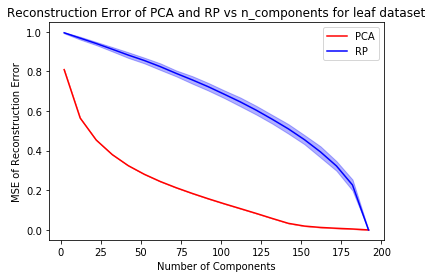

In [139]:
title = "Reconstruction Error of PCA and RP vs n_components for leaf dataset"
errorfill(n_components,np.array(rmse_reconstr_error_pca), np.array(stds_reconstr_error_pca),color = 'r',title = title,label='PCA')
errorfill(n_components,np.array(rmse_reconstr_error_rp), np.array(stds_reconstr_error_rp),color = 'b',title = title,label='RP')
plt.savefig('pics/reconstruction_error_leaf.png')
plt.show()

In [151]:
fa.score_samples(features).shape

(990,)

### check clustering label  if naturally line up

In [160]:
em99_cluster == dlabels

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [159]:
km99_cluster == dlabels

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,